In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from model import *
from data import *

In [8]:
DataClass = subjecData()
DataClass.build()

# Model evaluation

In [9]:
def Eval_Model(model, DataClass):
    
    model.eval()
    pred = model(DataClass.X_test)
    pred = torch.argmax(pred, dim=1)
    y_Test = torch.argmax(DataClass.y_test, dim=1)

    # Calculate test metrics
    accuracy = accuracy_score(y_Test, pred)
    precision = precision_score(y_Test, pred, average=None)
    recall = recall_score(y_Test, pred, average=None)
    f1 = f1_score(y_Test, pred, average=None)
    
    print(f' Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
    return accuracy, precision, recall, f1

In [10]:
NetDict = {'TimeAggNet':TimeAggNet,'TimeGraphNet':TimeGraphNet,'DeepTimeGraphNet':DeepTimeGraphNet,
           'SimpleTimeGraphNet':SimpleTimeGraphNet}

In [11]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
subj = 0
j = 0
epochs = 250

ps = []
recs = []
accs = []
f1s = []
names = []

for net_name in tqdm(NetDict.keys()):
    net = NetDict[net_name](device, DataClass.num_nodes, 1200)#El argumento cambia para las adaptative
    model_path = f"./training/models/sub{subj}/{net_name}.pth"
    #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}.csv"
    net.load_state_dict(torch.load(model_path))
    accuracy, precision, recall, f1 = Eval_Model(net, DataClass)
    ps.append(precision)
    recs.append(recall)
    accs.append(accuracy)
    f1s.append(f1)
    names.append(net_name)
    
    if j>=1:
        net = NetDict[net_name](device, DataClass.num_nodes, 1200, True)#El argumento cambia para las adaptative
        model_path = f"./training/models/sub{subj}/{net_name}Adap.pth"
        #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}Adap.csv"
        net.load_state_dict(torch.load(model_path))
        accuracy, precision, recall, f1 = Eval_Model(net, DataClass)
        ps.append(precision)
        recs.append(recall)
        accs.append(accuracy)
        f1s.append(f1)
        names.append(net_name+'Adap')
        
    j = j+1

 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.22it/s]

 Accuracy: 0.7538461538461538, Precision: [0.76666667 0.76923077 0.72151899], Recall: [0.78409091 0.8045977  0.67058824], F1-Score: [0.7752809  0.78651685 0.69512195]
 Accuracy: 0.8269230769230769, Precision: [0.85882353 0.8172043  0.80487805], Recall: [0.82954545 0.87356322 0.77647059], F1-Score: [0.84393064 0.84444444 0.79041916]


 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.39s/it]

 Accuracy: 0.75, Precision: [0.7721519  0.82352941 0.66666667], Recall: [0.69318182 0.8045977  0.75294118], F1-Score: [0.73053892 0.81395349 0.70718232]
 Accuracy: 0.8615384615384616, Precision: [0.86206897 0.90697674 0.81609195], Recall: [0.85227273 0.89655172 0.83529412], F1-Score: [0.85714286 0.9017341  0.8255814 ]


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:04<00:01,  1.89s/it]

 Accuracy: 0.8384615384615385, Precision: [0.85542169 0.94805195 0.74      ], Recall: [0.80681818 0.83908046 0.87058824], F1-Score: [0.83040936 0.8902439  0.8       ]
 Accuracy: 0.7807692307692308, Precision: [0.86956522 0.8313253  0.68518519], Recall: [0.68181818 0.79310345 0.87058824], F1-Score: [0.76433121 0.81176471 0.76683938]


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.55s/it]

 Accuracy: 0.7346153846153847, Precision: [0.71578947 0.7826087  0.69863014], Recall: [0.77272727 0.82758621 0.6       ], F1-Score: [0.7431694  0.80446927 0.64556962]


In [12]:
recs = np.array(recs)
ps = np.array(ps)
f1s = np.array(f1s)

dic = {'Accuracy':accs,'Recall class 0':recs[:,0],'Recall class 1':recs[:,1],'Recall class 2':recs[:,2],
       'Precision class 0':ps[:,0],'Precision class 1':ps[:,1],'Precision class 2':ps[:,2],'F1 class 0':f1s[:,0],
       'F1 class 1':f1s[:,1],'F1 class 2':f1s[:,2]}
df = pd.DataFrame.from_dict(dic)
df.index = names

df_sep = [df[df.columns[:4]], df[df.columns[4:-3]] , df[df.columns[-3:]]]
for sep in df_sep:
    print(sep.to_latex(float_format="%.3f", index=True))
    print('\\vspace{1em}')

\begin{tabular}{lrrrr}
\toprule
 & Accuracy & Recall class 0 & Recall class 1 & Recall class 2 \\
\midrule
TimeAggNet & 0.754 & 0.784 & 0.805 & 0.671 \\
TimeGraphNet & 0.827 & 0.830 & 0.874 & 0.776 \\
TimeGraphNetAdap & 0.750 & 0.693 & 0.805 & 0.753 \\
DeepTimeGraphNet & 0.862 & 0.852 & 0.897 & 0.835 \\
DeepTimeGraphNetAdap & 0.838 & 0.807 & 0.839 & 0.871 \\
SimpleTimeGraphNet & 0.781 & 0.682 & 0.793 & 0.871 \\
SimpleTimeGraphNetAdap & 0.735 & 0.773 & 0.828 & 0.600 \\
\bottomrule
\end{tabular}

\vspace{1em}
\begin{tabular}{lrrr}
\toprule
 & Precision class 0 & Precision class 1 & Precision class 2 \\
\midrule
TimeAggNet & 0.767 & 0.769 & 0.722 \\
TimeGraphNet & 0.859 & 0.817 & 0.805 \\
TimeGraphNetAdap & 0.772 & 0.824 & 0.667 \\
DeepTimeGraphNet & 0.862 & 0.907 & 0.816 \\
DeepTimeGraphNetAdap & 0.855 & 0.948 & 0.740 \\
SimpleTimeGraphNet & 0.870 & 0.831 & 0.685 \\
SimpleTimeGraphNetAdap & 0.716 & 0.783 & 0.699 \\
\bottomrule
\end{tabular}

\vspace{1em}
\begin{tabular}{lrrr}
\toprule
 &

# Training metrics plots

In [13]:
names = []
dataFrames = []
j = 0
for net_name in tqdm(NetDict.keys()):
    #net = NetDict[net_name](device, DataClass.num_nodes, 1200)#El argumento cambia para las adaptative
    #model_path = f"./training/models/sub{subj}/{net_name}.pth"
    metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}.csv"
    #net.load_state_dict(torch.load(model_path))
    dataFrames.append(pd.read_csv(metrics_path))
    names.append(net_name)
    
    if j>=1:
        #net = NetDict[net_name](device, DataClass.num_nodes, 1200, True)#El argumento cambia para las adaptative
        model_path = f"./training/models/sub{subj}/{net_name}Adap.pth"
        #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}Adap.csv"
        #net.load_state_dict(torch.load(model_path))
        dataFrames.append(pd.read_csv(metrics_path))
        names.append(net_name+'Adap')
        
    j = j+1

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 59.27it/s]


In [14]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

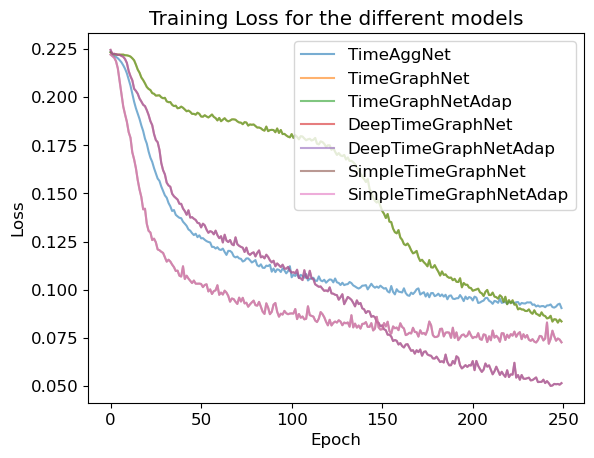

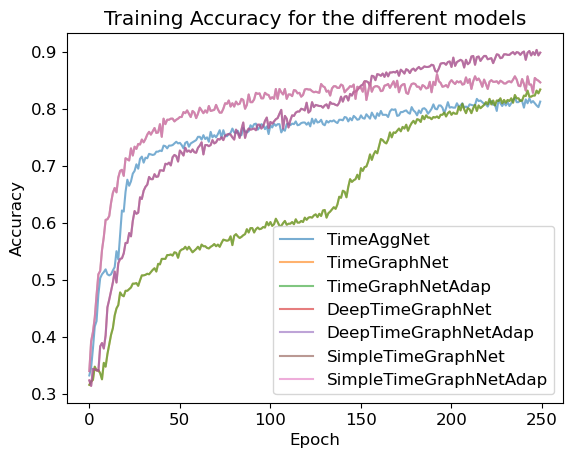

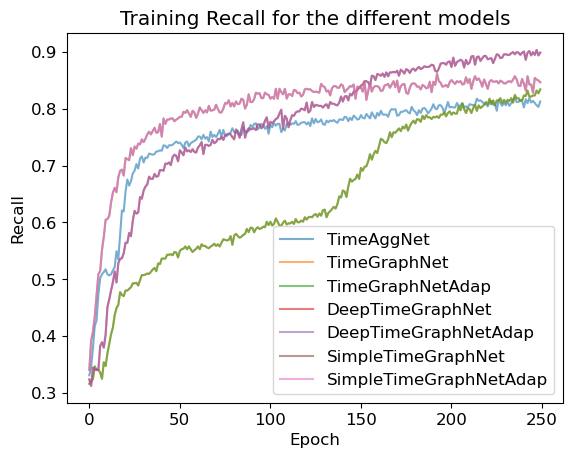

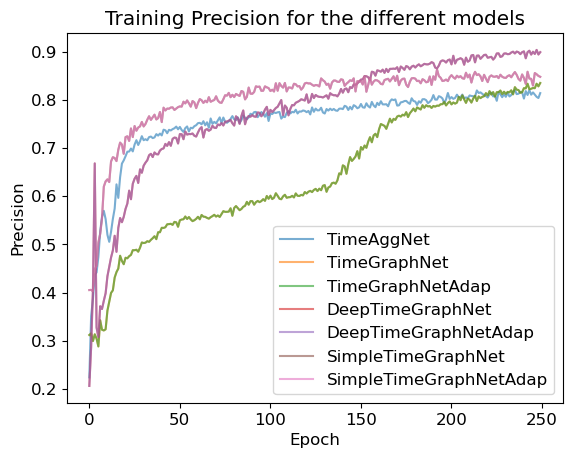

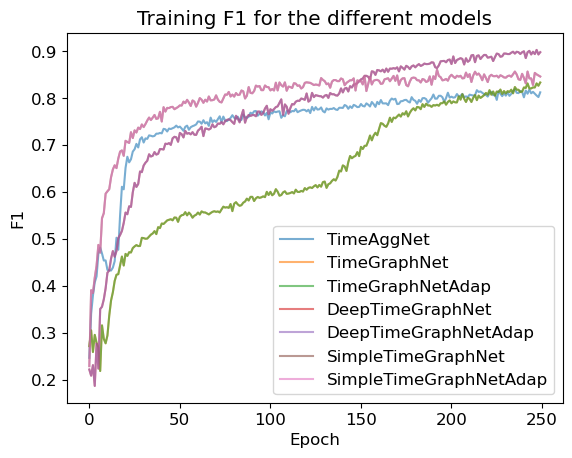

In [15]:
for Metric in dataFrames[0].columns[1:]:
    for i in range(len(dataFrames)):
        plt.plot(dataFrames[i][Metric], label=names[i], alpha=0.6)
        plt.xlabel('Epoch')
        plt.ylabel(Metric)
        plt.title(f"Training {Metric} for the different models")
    plt.legend()
    plt.savefig(f"./training/plots/Training_{Metric}.png")
    plt.show()

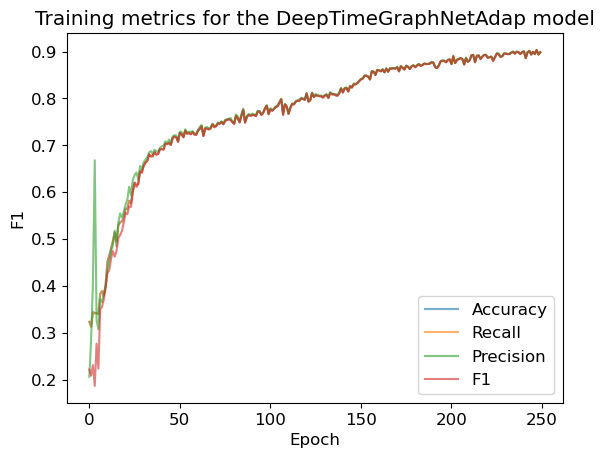

In [22]:
i = 4
for Metric in dataFrames[0].columns[2:]:
    plt.plot(dataFrames[i][Metric], label=Metric, alpha=0.6)
plt.xlabel('Epoch')
plt.ylabel(Metric)
plt.title(f"Training metrics for the DeepTimeGraphNetAdap model")
plt.legend()
plt.savefig(f"./training/plots/Training_Metrics_DeepTimeGraphNetAdap.png")
plt.show()

# Impact study

## Shapley values

In [23]:
import shap

In [26]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
subj = 0
net_name = "TimeAggNet"
net = NetDict[net_name](device, DataClass.num_nodes, 1200)#El argumento cambia para las adaptative
model_path = f"./training/models/sub{subj}/{net_name}.pth"
net.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [27]:
# Use SHAP to explain the model's predictions
explainer = shap.DeepExplainer(net, DataClass.X_train)
shap_values = explainer.shap_values(DataClass.X_test)

# Plot the SHAP values for one of the classes (e.g., class 0)
shap.summary_plot(shap_values[0], DataClass.X_test.numpy())

# For individual instance explanation
instance_index = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index], DataClass.X_test[instance_index].numpy())


RuntimeError: [enforce fail at C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 208857600 bytes.

In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
subj = 0
j = 0

for net_name in tqdm(NetDict.keys()):
    net = NetDict[net_name](device, 42, 1200)#El argumento cambia para las adaptative
    model_path = f"./training/models/sub{subj}/{net_name}.pth"
    #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}.csv"
    net.load_state_dict(torch.load(model_path))
    print(net)
    
    if j>=1:
        net = NetDict[net_name](device, 42, 1200, True)#El argumento cambia para las adaptative
        model_path = f"./training/models/sub{subj}/{net_name}Adap.pth"
        #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}Adap.csv"
        net.load_state_dict(torch.load(model_path))
        print(net)

        
    j = j+1

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

TimeAggNet(
  (time_convs): ModuleList(
    (0): Conv1d(1, 1, kernel_size=(10,), stride=(8,), padding=(1,))
    (1): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (2): Conv1d(1, 1, kernel_size=(3,), stride=(3,))
    (3): MaxPool1d(kernel_size=3, stride=3, padding=1, dilation=1, ceil_mode=False)
    (4): Conv1d(1, 1, kernel_size=(4,), stride=(1,))
  )
  (class_layer): Linear(in_features=42, out_features=3, bias=True)
)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.23it/s]

TimeGraphNet(
  (time_convs): ModuleList(
    (0): Conv1d(1, 1, kernel_size=(10,), stride=(8,), padding=(1,))
    (1): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (2): Conv1d(1, 1, kernel_size=(3,), stride=(3,))
    (3): MaxPool1d(kernel_size=3, stride=3, padding=1, dilation=1, ceil_mode=False)
    (4): Conv1d(1, 1, kernel_size=(4,), stride=(1,))
  )
  (gcn1): GCNConv(30, 30)
  (gcn2): GCNConv(4, 4)
  (class_layer): Linear(in_features=42, out_features=3, bias=True)
)
TimeGraphNet(
  (time_convs): ModuleList(
    (0): Conv1d(1, 1, kernel_size=(10,), stride=(8,), padding=(1,))
    (1): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (2): Conv1d(1, 1, kernel_size=(3,), stride=(3,))
    (3): MaxPool1d(kernel_size=3, stride=3, padding=1, dilation=1, ceil_mode=False)
    (4): Conv1d(1, 1, kernel_size=(4,), stride=(1,))
  )
  (gcn1): AdaptiveGCNLayer(
    (gcn): GCNConv(30, 30)
  )
  (gcn2): AdaptiveGCNLayer(
    (gcn): GCNConv